<a href="https://colab.research.google.com/github/JayanthK99/Jayanth_INFO5731_Spring2025/blob/main/Kaddipudi_Jayanth_Assignment_03_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [50]:
#Step 1
from collections import defaultdict
import csv

def tokenize(text):
    return text.split()

def generate_ngrams(tokens, n):
    return [tuple(tokens[i:i+n]) for i in range(len(tokens) - n + 1)]

file_path = "/content/List_of_narrators_Cleaned_File.csv"

try:
    with open(file_path, "r", encoding="utf-8") as file:
        lines = file.readlines()
except FileNotFoundError:
    print(f"File not found: {file_path}")
    exit()

bios = [line.split(",")[1] for line in lines[1:] if len(line.split(",")) > 1]

bigram_freq = defaultdict(int)
trigram_freq = defaultdict(int)

for bio in bios:
    tokens = tokenize(bio)
    for bigram in generate_ngrams(tokens, 2):
        bigram_freq[bigram] += 1
    for trigram in generate_ngrams(tokens, 3):
        trigram_freq[trigram] += 1

combined_data = []
for bigram, bigram_freq_value in bigram_freq.items():
    matching_trigrams = [trigram for trigram in trigram_freq if trigram[:2] == bigram]
    if matching_trigrams:
        for trigram in matching_trigrams:
            combined_data.append([*bigram, bigram_freq_value, *trigram, trigram_freq[trigram]])
    else:
        combined_data.append([*bigram, bigram_freq_value, "", "", "", ""])

with open('Ngram_frequencies.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Bigram_Word1", "Bigram_Word2", "Bigram_Frequency", "Trigram_Word1", "Trigram_Word2", "Trigram_Word3", "Trigram_Frequency"])
    writer.writerows(combined_data)

print("N-Gram Frequencies:")
for row in combined_data[:20]:
    print(f"Bigram: {row[0]}, {row[1]},{row[2]} | Trigram: {row[3]}, {row[4]}, {row[5]} ,{row[6]}")

N-Gram Frequencies:
Bigram: nisei, female,301 | Trigram: nisei, female, bear ,292
Bigram: nisei, female,301 | Trigram: nisei, female, grow ,7
Bigram: nisei, female,301 | Trigram: nisei, female, may ,1
Bigram: nisei, female,301 | Trigram: nisei, female, novel ,1
Bigram: female, bear,391 | Trigram: female, bear, may ,42
Bigram: female, bear,391 | Trigram: female, bear, doctor ,26
Bigram: female, bear,391 | Trigram: female, bear, julia ,36
Bigram: female, bear,391 | Trigram: female, bear, august ,27
Bigram: female, bear,391 | Trigram: female, bear, january ,34
Bigram: female, bear,391 | Trigram: female, bear, june ,24
Bigram: female, bear,391 | Trigram: female, bear, decent ,23
Bigram: female, bear,391 | Trigram: female, bear, novel ,25
Bigram: female, bear,391 | Trigram: female, bear, march ,26
Bigram: female, bear,391 | Trigram: female, bear, lo ,3
Bigram: female, bear,391 | Trigram: female, bear, february ,30
Bigram: female, bear,391 | Trigram: female, bear, denver ,2
Bigram: female, b

In [51]:
#Step 2
from collections import defaultdict
import csv
word_freq = defaultdict(int)
bigram_start_freq = defaultdict(int)

for bio in bios:
    tokens = tokenize(bio)
    for word in tokens:
        word_freq[word] += 1
for bigram, count in bigram_freq.items():
    w1 = bigram[0]
    bigram_start_freq[w1] += count

bigram_probabilities = {}
for bigram, count in bigram_freq.items():
    w1 = bigram[0]
    if bigram_start_freq[w1] > 0:
        bigram_probabilities[bigram] = count / bigram_start_freq[w1]

with open('bigram_probabilities.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Word1", "Word2", "Probability"])
    for bigram, prob in bigram_probabilities.items():
        writer.writerow([bigram[0], bigram[1], prob])

first_10_bigrams = list(bigram_probabilities.items())[:10]
for bigram, prob in first_10_bigrams:
    print(f"{bigram[0]}, {bigram[1]}: {prob:.4f}")

nisei, female: 0.4062
female, bear: 0.9444
bear, may: 0.0818
may, select: 0.0122
select, washington: 0.2000
washington, spend: 0.0535
spend, much: 0.0308
much, childhood: 0.2000
childhood, beaverton: 0.0196
beaverton, oregon: 1.0000


In [52]:
#Step 3
import re
import pandas as pd
from collections import defaultdict, Counter

stop_words = {
    'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'is', 'it', 'you', 'he', 'she', 'we', 'they',
    'this', 'that', 'these', 'those', 'my', 'your', 'his', 'her', 'its', 'their', 'our', 'i', 'of', 'to', 'for', 'on', 'in',
    'at', 'with', 'by', 'from', 'about', 'as', 'than', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did',
    'doing', 'the', 'if', 'will', 'just', 'don', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
    'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn',
    'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'
}

def is_noun(word):
    if word.lower() in stop_words:
        return False

    noun_suffixes = ['ness', 'ion', 'ment', 'ness', 'er', 'or', 'ism', 'ant', 'age']
    if any(word.endswith(suffix) for suffix in noun_suffixes):
        return True

    if word[0].isupper():
        return True

    return False

def is_determiner(word):
    determiners = {'the', 'a', 'an', 'this', 'that', 'these', 'those', 'my', 'your', 'his', 'her', 'its', 'their', 'our'}
    return word.lower() in determiners

def extract_combined_noun_phrases(text):
    words = text.split()
    noun_phrases = []
    phrase = []

    for word in words:
        word = word.strip(",.!?")

        if is_noun(word):
            if phrase:
                phrase.append(word)
            else:
                phrase = [word]
        elif is_determiner(word) and not phrase:
            phrase = [word]
        else:
            if phrase:
                if len(phrase) > 1 and is_noun(phrase[-1]):
                    noun_phrases.append(" ".join(phrase))
                phrase = []

    if phrase:
        if len(phrase) > 1 and is_noun(phrase[-1]):
            noun_phrases.append(" ".join(phrase))

    return noun_phrases

def compute_global_noun_phrase_frequencies(narrators):
    global_noun_phrase_counts = Counter()
    narrator_noun_phrases = defaultdict(list)

    for i, narrator in enumerate(narrators):
        noun_phrases = extract_combined_noun_phrases(narrator)
        global_noun_phrase_counts.update(noun_phrases)
        narrator_noun_phrases[i] = noun_phrases

    return global_noun_phrase_counts, narrator_noun_phrases

def compute_relative_probabilities(narrator_noun_phrases):
    results = []

    for narrator_id, noun_phrases in narrator_noun_phrases.items():
        narrator_counts = Counter(noun_phrases)
        total_phrases = sum(narrator_counts.values())

        if total_phrases == 0:
            continue

        relative_probs = {phrase: count / total_phrases for phrase, count in narrator_counts.items()}
        results.append({"narrator": narrator_id + 1, "relative_probabilities": relative_probs})

    return results

def display_table(data):
    headers = ["Narrator", "Noun Phrase", "Relative Probability"]
    col_widths = [10, 30, 20]
    header_row = " | ".join([f"{header:<{width}}" for header, width in zip(headers, col_widths)])
    print(header_row)
    print("-" * len(header_row))

    for row in data[:50]:
        narrator, noun_phrase, relative_prob = row
        formatted_row = [
            f"{narrator:<{col_widths[0]}}",
            f"{noun_phrase:<{col_widths[1]}}",
            f"{relative_prob:<{col_widths[2]}}"
        ]
        print(" | ".join(formatted_row))

file_path = "/content/List_of_narrators.csv"
df = pd.read_csv(file_path)

if "Bio" in df.columns:
    narrators = df["Bio"].dropna().tolist()
else:
    raise ValueError("Error: 'Bio' column not found in file.")

global_noun_phrase_counts, narrator_noun_phrases = compute_global_noun_phrase_frequencies(narrators)
results = compute_relative_probabilities(narrator_noun_phrases)

table_data = []
for result in results:
    narrator = result['narrator']
    relative_probs = result['relative_probabilities']
    for phrase, prob in relative_probs.items():
        table_data.append([narrator, phrase, f"{prob:.2f}"])

display_table(table_data)


Narrator   | Noun Phrase                    | Relative Probability
------------------------------------------------------------------
1          | Born May                       | 0.12                
1          | Selleck Washington Spent       | 0.12                
1          | Beaverton Oregon               | 0.12                
1          | Christianity During World War II | 0.12                
1          | the Portland Assembly Center Oregon | 0.12                
1          | the Minidoka concentration     | 0.12                
1          | Idaho After                    | 0.12                
1          | Seattle Washington             | 0.12                
2          | Born June                      | 0.09                
2          | Seattle Washington Grew        | 0.09                
2          | other Japanese Americans       | 0.09                
2          | the University                 | 0.09                
2          | Pearl Harbor Removed           | 0.09     

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [53]:
#Step 1
import csv
import re
import math

def read_and_tokenize(file_path):
    with open(file_path, newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        texts = [(row["Bio"], row["Date & Location"]) for row in reader if row["Bio"]]
        tokenized_corpus = []
    for bio, date_location in texts:
        tokens = re.findall(r"\b\w+\b", bio.lower())
        tokenized_corpus.append(tokens)
    return tokenized_corpus

def compute_tf(doc_tokens):
    word_count = {}
    total_words = len(doc_tokens)
    for word in doc_tokens:
        word_count[word] = word_count.get(word, 0) + 1

    tf_values = {word: count / total_words for word, count in word_count.items()}
    return tf_values

def compute_idf(tokenized_corpus):
    N = len(tokenized_corpus)
    idf_values = {}
    all_words = set(word for doc in tokenized_corpus for word in doc)

    for word in all_words:
        doc_freq = sum(1 for doc in tokenized_corpus if word in doc)
        idf_values[word] = math.log(N / doc_freq) if doc_freq > 0 else 0
    return idf_values

def compute_tf_idf(file_path):
    tokenized_corpus = read_and_tokenize(file_path)
    tf_values = [compute_tf(doc) for doc in tokenized_corpus]
    idf_values = compute_idf(tokenized_corpus)

    tf_idf_matrix = []
    for tf in tf_values:
        tf_idf_matrix.append({word: tf[word] * idf_values[word] for word in tf})
    return tf_idf_matrix

def save_tf_idf_to_csv(tf_idf_matrix, output_file):
    headers = ['Word', 'TF-IDF']
    with open(output_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(headers)
        for doc in tf_idf_matrix:
            for word, tfidf_value in doc.items():
                writer.writerow([word, tfidf_value])

def display_first_few_rows(file_path, n=5):
    with open(file_path, mode='r', newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        for i, row in enumerate(reader):
            if i == 0:
                print(row)
            elif i < n + 1:
                print(row)

file_path = "/content/List_of_narrators.csv"
output_file = "/content/tf_idf.csv"
tf_idf_matrix = compute_tf_idf(file_path)
save_tf_idf_to_csv(tf_idf_matrix, output_file)
display_first_few_rows(output_file, 10)


['Word', 'TF-IDF']
['nisei', '0.004853111201765816']
['female', '0.013536727730556149']
['born', '0.0010856721563717272']
['may', '0.03826019490022871']
['9', '0.0555371755431867']
['1927', '0.04873974858504763']
['in', '0.0014563745011462936']
['selleck', '0.08934063057912853']
['washington', '0.038887575549949246']
['spent', '0.044313870547327924']


In [54]:
#Step 2
import math
from collections import defaultdict
import pandas as pd

def compute_tf(document):
    word_counts = defaultdict(int)
    for word in document:
        word_counts[word] += 1
    max_count = max(word_counts.values(), default=1)
    tf_dict = {word: count / max_count for word, count in word_counts.items()}
    return tf_dict

def compute_idf(corpus):
    idf_dict = {}
    total_documents = len(corpus)
    all_words = set(word for doc in corpus for word in doc)

    for word in all_words:
        containing_docs = sum(1 for doc in corpus if word in doc)
        idf_dict[word] = math.log((total_documents + 1) / (containing_docs + 1)) + 1

    return idf_dict

def compute_tfidf(corpus):
    idf_dict = compute_idf(corpus)
    tfidf_matrix = []

    for doc in corpus:
        tf_dict = compute_tf(doc)
        tfidf_doc = {}
        for word, tf_value in tf_dict.items():
            idf_value = idf_dict.get(word, 0)
            tfidf_doc[word] = tf_value * idf_value
        magnitude = math.sqrt(sum(val**2 for val in tfidf_doc.values()))
        tfidf_doc = {word: val / magnitude for word, val in tfidf_doc.items()}
        tfidf_matrix.append(tfidf_doc)
    return tfidf_matrix, idf_dict

def cosine_similarity(vec1, vec2):
    all_words = set(vec1.keys()).union(set(vec2.keys()))
    dot_product = sum(vec1.get(word, 0) * vec2.get(word, 0) for word in all_words)
    magnitude_vec1 = math.sqrt(sum(val**2 for val in vec1.values()))
    magnitude_vec2 = math.sqrt(sum(val**2 for val in vec2.values()))
    if magnitude_vec1 == 0 or magnitude_vec2 == 0:
        return 0.0
    return dot_product / (magnitude_vec1 * magnitude_vec2)

def compute_tfidf_for_query(query, idf_dict):
    tf_dict = compute_tf(query)
    tfidf_query = {}
    for word, tf_value in tf_dict.items():
        idf_value = idf_dict.get(word, 0)
        tfidf_query[word] = tf_value * idf_value
    magnitude = math.sqrt(sum(val**2 for val in tfidf_query.values()))
    tfidf_query = {word: val / magnitude for word, val in tfidf_query.items()}
    return tfidf_query

def rank_documents_by_query(query, df, text_column='Bio'):
    df[text_column] = df[text_column].fillna('').astype(str)
    corpus = df[text_column].apply(lambda x: x.split()).tolist()
    tfidf_matrix, idf_dict = compute_tfidf(corpus)
    query_tfidf = compute_tfidf_for_query(query.split(), idf_dict)
    similarities = [(i, cosine_similarity(query_tfidf, doc_tfidf)) for i, doc_tfidf in enumerate(tfidf_matrix)]
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities
file_path = '/content/List_of_narrators.csv'
df = pd.read_csv(file_path)
print(f"Missing values in 'Bio' column: {df['Bio'].isnull().sum()}")

query = "Narrator called Jayanth is from California"
ranked_docs = rank_documents_by_query(query, df, text_column='Bio')

for rank, (index, similarity) in enumerate(ranked_docs[:10]):
    print(f"Rank {rank+1}: Narrator {index+1} - Similarity: {similarity:.4f}")
    print(f"Bio: {df.iloc[index]['Bio']}")
    print()

Missing values in 'Bio' column: 4
Rank 1: Narrator 902 - Similarity: 0.2081
Bio: Yonsei female. Born in 1990 in Champaign, Illinois. Father's family is from Canada and her mother is from Japan. Paternal grandparents were incarcerated in Tashme and Lillooet in Canada. After attending college on the East Coast, moved to Chicago and became active in the Japanese American community.

Rank 2: Narrator 560 - Similarity: 0.1588
Bio: Nisei male. Born August 28, 1923, in Honolulu, Hawaii. After the bombing of Pearl Harbor, volunteered for the army and served in Europe with the 442nd Regimental Combat Team. After discharge, was called back to active duty and served with the U.S. Counterintelligence Corps in Japan.

Rank 3: Narrator 679 - Similarity: 0.1338
Bio: Sansei female. Grew up in California and attended San Francisco State University.

Rank 4: Narrator 886 - Similarity: 0.1248
Bio: Sansei female. Born in 1947 in Pasadena, California. Parents were incarcerated at the Manzanar concentration

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
!pip install pandas gensim numpy matplotlib scikit-learn nltk

In [55]:
#Step 1
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
import re
from gensim.models import Word2Vec

nltk.download('punkt_tab')
df = pd.read_csv('/content/List_of_narrators_Cleaned_File.csv')

bios = df['Bio'].dropna().tolist()
date_location = df['Date and Location'].dropna().tolist()

sentences = bios + date_location
def clean_text(input_text):
    input_text = re.sub(r'[^a-zA-Z\s,]', '', input_text)
    input_text = input_text.lower()
    return input_text
tokenized_sentences = [word_tokenize(clean_text(sentence)) for sentence in sentences]
model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=300,
    window=5,
    min_count=2,
    workers=4
)
model.save("densho_word2vec.model")
print(f"Vocabulary size: {len(model.wv)}")
print(f"Example word vector for 'Author': {model.wv['camp']}")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Vocabulary size: 2132
Example word vector for 'Author': [ 0.1830364   0.90499735  0.16031504  0.17932777 -0.09527792 -0.24768588
  0.43780813  0.705994    0.22877653  0.26838672  0.19639398  0.3887546
  0.04771994 -0.04824401  0.47680166 -0.2712047  -0.28398237  0.16964206
 -0.46820265 -0.04162698 -0.00932973  0.08318228  0.54474163  0.23268083
 -0.25935343 -0.530595   -0.41457734 -0.26854488 -0.7225313  -0.4325828
 -0.17041801 -0.31909496  0.15236332 -0.4688395   0.20657413  0.35729805
  0.15816157 -0.31974447 -0.6670548   0.82827675  0.1741751   0.43408605
 -0.10631848 -0.19919369  0.39725983  0.76447433  0.46841514 -0.27385026
 -0.13206618 -0.11602205  0.13395005 -0.26904622 -0.5483257  -0.09838101
 -0.7779929   0.02523552  0.14682202  0.43361074 -0.04964337 -0.08057363
 -0.19009325 -0.06158527 -0.04195467  0.40287265  0.34943914 -0.3610885
  0.3822546   0.13809974 -0.21526454 -0.00343076 -0.11120911 -0.2433028
  0.01998484  0.10553598  0.11241196 -0.43830234 -0.34531042 -0.12042604

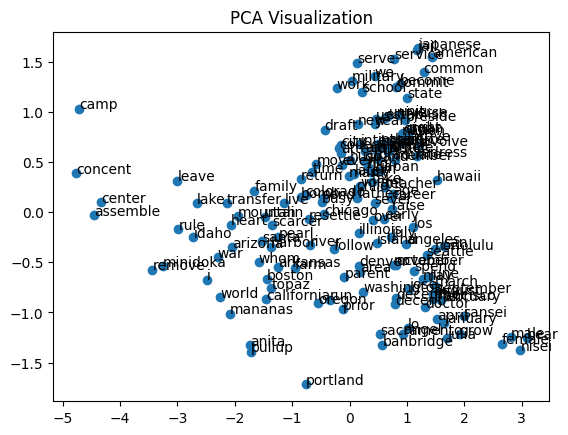

In [65]:
#Step 2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = list(model.wv.index_to_key)
X = model.wv[words]

n = 150
words = words[:n]
X = X[:n]

pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("PCA Visualization")
plt.show()

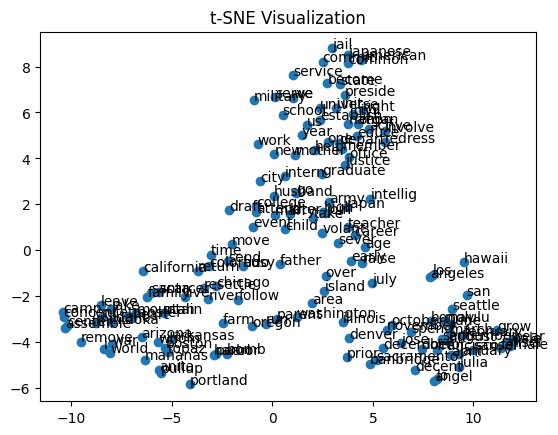

In [64]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
result = tsne.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("t-SNE Visualization")
plt.show()

In [56]:
#Step 3
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def word_similarity(model, word1, word2):
    if word1 in model.wv and word2 in model.wv:
        vec1 = model.wv[word1].reshape(1, -1)
        vec2 = model.wv[word2].reshape(1, -1)
        return cosine_similarity(vec1, vec2)[0][0]
    else:
        return None
word_pairs = [  ('war', 'loyalty'),
    ('memory', 'history'),
    ('art', 'culture')]

for pair in word_pairs:
    similarity = word_similarity(model, pair[0], pair[1])
    if similarity is not None:
        print(f"Cosine similarity between {pair[0]} and {pair[1]}: {similarity}")
    else:
        print(f"One or both words ({pair[0]}, {pair[1]}) are not in the vocabulary")

Cosine similarity between war and loyalty: 0.8830195069313049
Cosine similarity between memory and history: 0.9987737536430359
Cosine similarity between art and culture: 0.9940430521965027


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



Answer:
1.I will be performing Sentimental Analysis for my data file as it is suitable for something like twitter where users express their opinions.

2.Positive: Texts expressing happiness, satisfaction, or approval.

Negative: Texts expressing dissatisfaction, anger, or disappointment.

Neutral: Texts that are factual or do not express strong emotions.

In [ ]:
# The GitHub link of your final csv file
https://github.com/JayanthK99/Jayanth_INFO5731_Spring2025/blob/main/INFO_5731_Assignment_4_dataset.csv
# Link:

# The GitHub link of your final csv file
https://github.com/JayanthK99/Jayanth_INFO5731_Spring2025/blob/main/INFO_5731_Assignment_4_dataset.csv
# Link:

# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

Answer: The assignment was OK when compared to previous assignments . I enjoyed applying NLP techniques. The time provided was sufficient and it was a  great learning experience.

